In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
SHG = pd.read_csv('cleaned_SHG_Data.csv')
SHG.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


# Cancellation Analysis:
## a) What factors are most strongly correlated with cancellations, and can we predict potential cancellations based on certain variables?

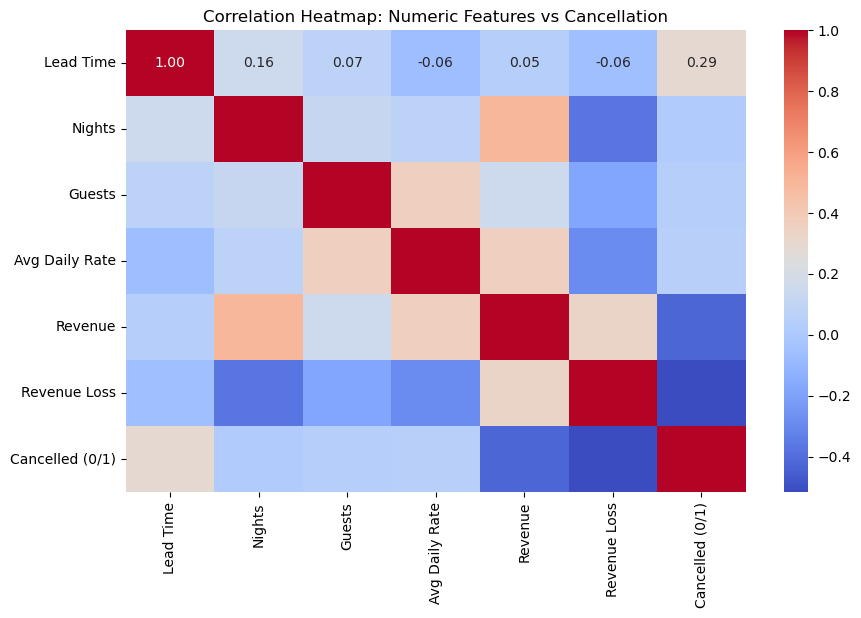

In [4]:
# Numerical Data Correlation Analysis
numeric_features = ['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate', 'Revenue', 'Revenue Loss', 'Cancelled (0/1)']

plt.figure(figsize=(10, 6))
corr_matrix = SHG[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Numeric Features vs Cancellation')
plt.show()

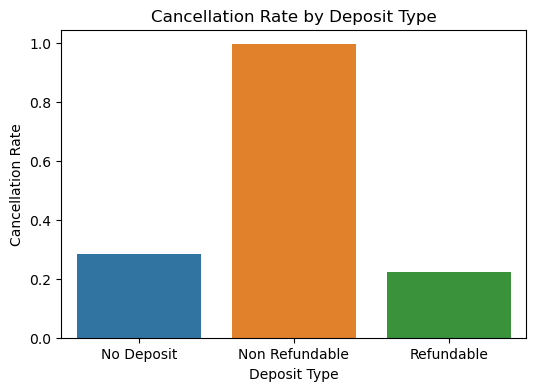

In [6]:
# Cancellation rate by Deposit Type
deposit_cancel_rate = SHG.groupby('Deposit Type')['Cancelled (0/1)'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Deposit Type', y='Cancelled (0/1)', data=deposit_cancel_rate)
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Deposit Type')
plt.show()

In [36]:
deposit_cancel_rate

,Deposit Type,Cancelled (0/1)
0,No Deposit,0.284020
1,Non Refundable,0.993624
2,Refundable,0.222222


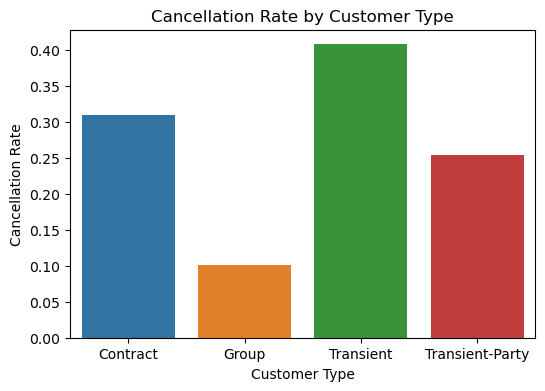

In [18]:
# Cancellation rate by Customer Type
Customer_type_cancel_rate = SHG.groupby('Customer Type')['Cancelled (0/1)'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='Customer Type', y='Cancelled (0/1)', data=Customer_type_cancel_rate)
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Customer Type')
plt.show()

In [27]:
# found out there are 4 undefined distribution channel
SHG[SHG['Distribution Channel'] == 'Undefined']

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
14587,14595,Resort,2015-03-24,2015-07-05,103,5,3,Undefined,Transient,Portugal,No Deposit,113.0,Check-Out,2015-07-10,0,564.0,0.0
40586,40601,City,2015-08-01,2015-08-03,2,1,2,Undefined,Transient-Party,Portugal,No Deposit,12.0,Canceled,2015-08-01,1,0.0,-12.0
40653,40668,City,2015-08-04,2015-08-05,1,2,2,Undefined,Transient-Party,Portugal,No Deposit,12.0,Canceled,2015-08-04,1,0.0,-24.0
40665,40680,City,2015-08-04,2015-08-05,1,2,3,Undefined,Transient-Party,Portugal,No Deposit,18.0,Canceled,2015-08-04,1,0.0,-36.0
41143,41161,City,2015-08-05,2015-08-13,8,7,2,Undefined,Transient-Party,Portugal,No Deposit,76.0,Canceled,2015-08-09,1,0.0,-536.0


In [28]:
SHG = SHG[SHG['Distribution Channel'] != 'Undefined'].reset_index(drop=True)

In [29]:
print(SHG['Distribution Channel'].value_counts())

Distribution Channel
Online Travel Agent     73989
Offline Travel Agent    23954
Direct                  14611
Corporate                6651
Name: count, dtype: int64


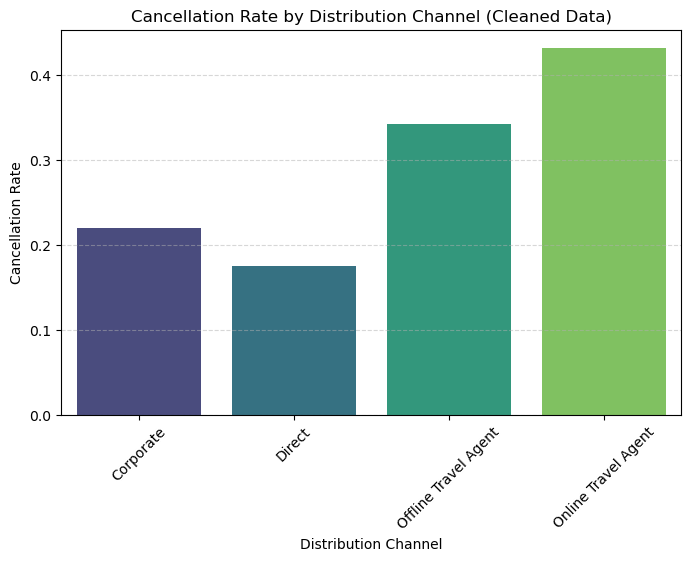

In [30]:
# Group and calculate cancellation rate
cancel_rate = SHG.groupby('Distribution Channel')['Cancelled (0/1)'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Distribution Channel', y='Cancelled (0/1)', data=cancel_rate, palette='viridis')

plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate')
plt.xlabel('Distribution Channel')
plt.title('Cancellation Rate by Distribution Channel (Cleaned Data)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [34]:
cancel_rate = SHG.groupby('Distribution Channel')['Cancelled (0/1)'].mean().reset_index()
cancel_rate = cancel_rate.sort_values(by='Cancelled (0/1)', ascending=False)
cancel_rate

,Distribution Channel,Cancelled (0/1)
3,Online Travel Agent,0.432186
2,Offline Travel Agent,0.342156
0,Corporate,0.220568
1,Direct,0.174868


# Step 3: Lead Time Distribution by Cancellation
## I already saw that Lead Time correlates with Cancellation. Now I want to visually confirm:
### Are lead times generally higher for canceled bookings compared to non-canceled bookings?

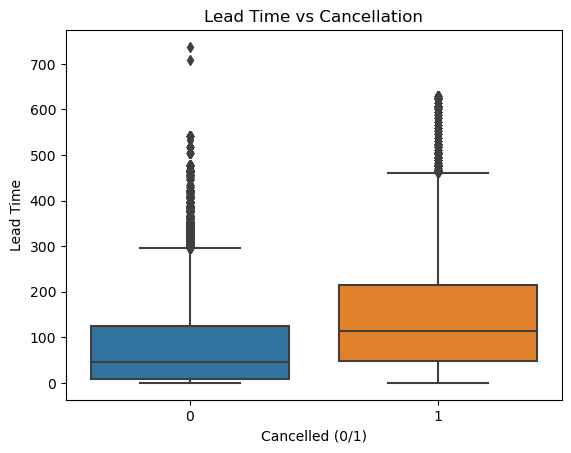

In [35]:
sns.boxplot(x='Cancelled (0/1)', y='Lead Time', data=SHG)
plt.title('Lead Time vs Cancellation')
plt.show()

## b) How does the revenue loss from cancellations compare across different customer segments and distribution channels?

### Step 1: Focus Only on Canceled Bookings

In [37]:
# filtered my DataFrame where Canceled (0/1) == 1
SHG_canceled = SHG[SHG['Cancelled (0/1)'] == 1]

### Step 2: Group and Calculate Average Revenue Loss by Customer Type
* Why:
* This tells me which customer segment’s cancellations hit revenue the hardest on average.

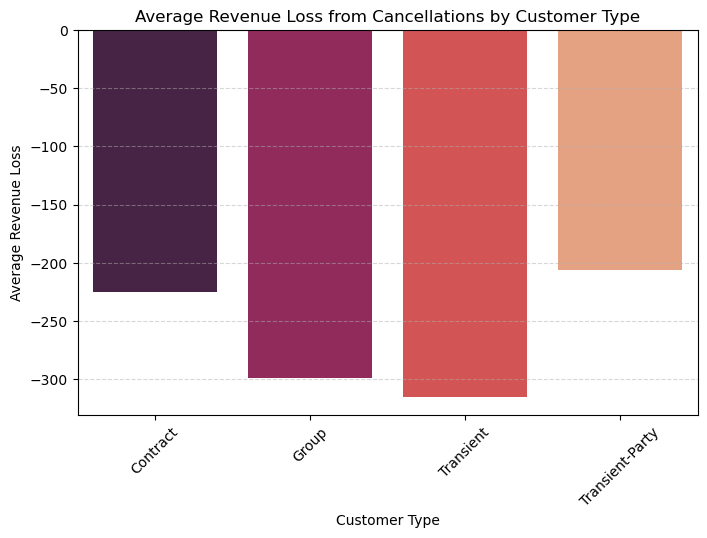

In [39]:
customer_revenue_loss = SHG_canceled.groupby('Customer Type')['Revenue Loss'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Type', y='Revenue Loss', data=customer_revenue_loss, palette='rocket')
plt.xticks(rotation=45)
plt.ylabel('Average Revenue Loss')
plt.title('Average Revenue Loss from Cancellations by Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [42]:
customer_revenue_loss = customer_revenue_loss.sort_values(by='Revenue Loss', ascending=True)
customer_revenue_loss

,Customer Type,Revenue Loss
2,Transient,-315.185044
1,Group,-298.724138
0,Contract,-224.960380
3,Transient-Party,-206.690801


## Step 3: Group and Calculate Average Revenue Loss by Distribution Channel
* Why:
* i want to check which channel’s cancellations affect revenue the most — not just how often they cancel, but how expensive those cancellations are.

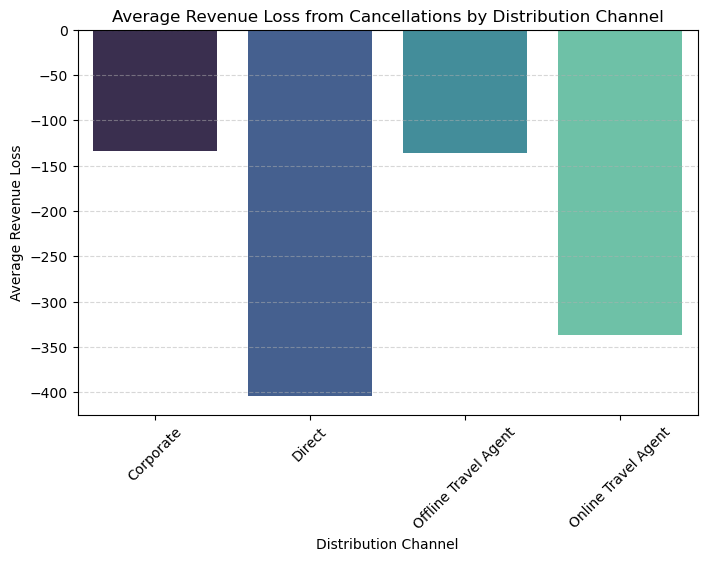

In [43]:
channel_revenue_loss = SHG_canceled.groupby('Distribution Channel')['Revenue Loss'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Distribution Channel', y='Revenue Loss', data=channel_revenue_loss, palette='mako')
plt.xticks(rotation=45)
plt.ylabel('Average Revenue Loss')
plt.title('Average Revenue Loss from Cancellations by Distribution Channel')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [44]:
channel_revenue_loss = channel_revenue_loss.sort_values(by='Revenue Loss', ascending=True)
channel_revenue_loss

,Distribution Channel,Revenue Loss
1,Direct,-404.421918
3,Online Travel Agent,-337.210933
2,Offline Travel Agent,-135.504270
0,Corporate,-133.331970
